In [3]:
from slice_sampler import SliceSampler
from mh_componentwise import MetropolisHastingsComponentwise
import de_mcmc_one_core as demcmc
import numpy as np
import scipy.stats as scps
import matplotlib.pyplot as plt

In [4]:
def normal_target(params, data):
    lp = 0
    for i in range(data.shape[0]):
        lp += scps.norm.logpdf(data[i], loc = params[0], scale = params[1])
    return lp

In [5]:
data = np.random.normal(loc = 0, scale = 2, size = 100)
bounds = np.array([[-10, 10], [0.1, 5]])

In [ ]:
my_slice_sampler = SliceSampler(bounds = bounds, target = normal_target)

In [ ]:
my_slice_sampler.sample(data, num_samples = 10, method = 'doubling', init_loc = 'random', add = True)

In [ ]:
plt.plot(my_slice_sampler.samples[500:, 0], my_slice_sampler.samples[500:, 1])
plt.xlabel('mean')
plt.ylabel('sd')

In [ ]:
plt.hist(my_slice_sampler.samples[500:, 0])

In [ ]:
plt.hist(my_slice_sampler.samples[500:, 1])

In [ ]:
my_slice_sampler.samples.shape

In [ ]:
# Metropolis Hastings componentwise
mh_sampler = MetropolisHastingsComponentwise(dims = 2,
                                             num_chains = 4, 
                                             bounds = bounds, 
                                             target = normal_target, 
                                             proposal_var = 0.1)

In [ ]:
mh_sampler.sample(data = data, num_samples = 500, add = True, n_cores = 4)

In [ ]:
# SOME GRAPHS
plt.scatter(mh_sampler.samples[:, 2, :][:, 0], mh_sampler.samples[:, 2, :][:, 1], alpha = 0.01)

In [ ]:
plt.plot(np.arange(0, 3000, 1), mh_sampler.samples[:, 1, :][:, 1])

In [ ]:
plt.plot(np.arange(0, 3000, 1), mh_sampler.samples[:, 1, :][:, 0])

In [ ]:
plt.hist(mh_sampler.samples[1500:, 2, :][:, 0], bins = 30)

In [ ]:
plt.hist(mh_sampler.samples[1500:, 2, :][:, 1], bins = 30)

In [ ]:
mh_sampler.samples[101, :, :]

In [22]:
# DEMCMC
my_demcmc = demcmc.DifferentialEvolutionSequential(bounds = bounds, target = normal_target)

In [23]:
my_demcmc.sample(data = data, num_samples = 2000, add = False, crossover = True, anneal_k = 1 / 50)

Beginning sampling:
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 1100
Iteration 1200
Iteration 1300
Iteration 1400
Iteration 1500
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900


(array([[[-4.30376711,  3.13662696],
         [ 2.48716735,  2.99846604],
         [-5.85995936,  2.17631597],
         ...,
         [ 5.37629846,  2.93257003],
         [ 2.36357794,  2.47046457],
         [ 4.42121241,  0.91177637]],
 
        [[-4.30376711,  3.14076242],
         [ 0.18269883,  3.64785977],
         [-3.48797181,  2.17631597],
         ...,
         [ 5.37629846,  2.93257003],
         [ 2.36357794,  2.54002594],
         [ 4.42121241,  0.91177637]],
 
        [[-0.42686008,  2.52810697],
         [ 0.18269883,  3.64785977],
         [-3.48797181,  2.17631597],
         ...,
         [ 5.37629846,  2.93257003],
         [ 2.36357794,  2.54002594],
         [ 4.42121241,  0.91177637]],
 
        ...,
 
        [[-0.01321313,  1.94361592],
         [-0.11608079,  2.11803471],
         [-0.2701543 ,  2.18258019],
         ...,
         [ 0.0411207 ,  2.05154188],
         [-0.09828943,  2.01695231],
         [ 0.18347195,  2.40249035]],
 
        [[-0.04586618,  1.943

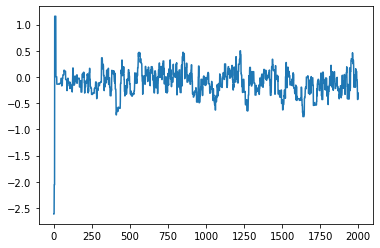

In [24]:
plt.plot(np.arange(0, 2000, 1), my_demcmc.samples[:, 3, :][:, 0])

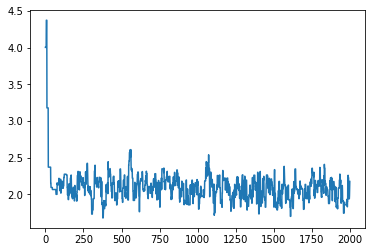

In [25]:
plt.plot(np.arange(0,2000, 1), my_demcmc.samples[:, 3, :][:, 1])

(array([ 32.,  97., 221., 389., 314., 260., 107.,  65.,  13.,   2.]),
 array([1.709985  , 1.7974677 , 1.88495041, 1.97243311, 2.05991582,
        2.14739852, 2.23488123, 2.32236393, 2.40984664, 2.49732934,
        2.58481205]),
 <a list of 10 Patch objects>)

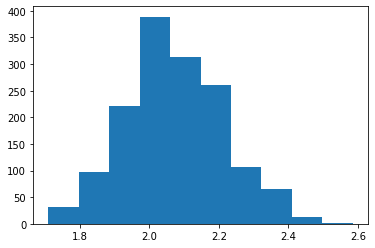

In [36]:
plt.hist(my_demcmc.samples[:, 4, :][500:, 1], bins = 10)

In [16]:
def flipped_logistic(x = 0, x_0 = 100, k = 1, L = 10):
    return 1 + 2*L - (2*L / (1 + np.exp(-k * (x - x_0))))

In [17]:
t = np.linspace(0, 2000, 1000)
x = np.zeros(1000)
y = np.zeros(1000)

In [18]:
x_0 = 100
k = 1
L = 10
cnt = 0
for tmp in t:
    x[cnt] = flipped_logistic(x = tmp, x_0 = 0, k = 1/50, L = 10)
    cnt += 1

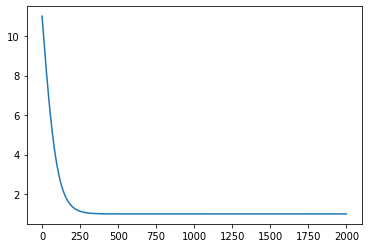

In [19]:
plt.plot(t, x)

In [21]:
x[500]

1.0000000404059932

In [27]:
np.sqrt(np.var(data))

2.0455124640963187

In [28]:
np.mean(data)

-0.07230241803522647